# Covid-19 infección en Ecuador. Modelos matemáticos y predicciones

Una comparación de modelos, lineal, polilnomico,logísticos y exponenciales aplicados a la infección por el virus Covid-19

Se realiza un análisis matemático simple del crecimiento de la infección en Python y dos modelos para comprender mejor la evolución de la infección.

Se crea modelos de series temporales del número total de personas infectadas hasta la fecha (es decir, las personas realmente infectadas más las personas que han sido infectadas). Estos modelos tienen parámetros , que se estimarán por ajuste de curva.

In [1]:
# Importar las librerias para el analasis
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [2]:
# Actualizar los datos (URL)

url = 'http://cowid.netlify.com/data/full_data.csv'

df = pd.read_csv(url)
df

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2020-02-25,Afghanistan,NaN,NaN,1,NaN
1,2020-02-26,Afghanistan,0.0,NaN,1,NaN
2,2020-02-27,Afghanistan,0.0,NaN,1,NaN
3,2020-02-28,Afghanistan,0.0,NaN,1,NaN
4,2020-02-29,Afghanistan,0.0,NaN,1,NaN
...,...,...,...,...,...,...
2862,2020-03-13,World,7488.0,338.0,132758,4956.0
2863,2020-03-14,World,9761.0,433.0,142534,5392.0
2864,2020-03-15,World,10967.0,343.0,153517,5735.0
2865,2020-03-16,World,13971.0,855.0,167506,6606.0


In [3]:
df = df[df['location'].isin(['Ecuador'])] #Filtro la Informacion solo para Ecuador
df = df.loc[:,['date','total_cases']] #Selecciono las columnas de analasis
# Expresar las fechas en numero de dias desde el 01 Enero
FMT = '%Y-%m-%d'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)

df

,date,total_cases
681,60,1
682,61,1
683,62,6
684,63,7
685,64,7
686,65,13
687,66,14
688,67,14
689,68,15
690,69,15


<AxesSubplot:xlabel='date'>

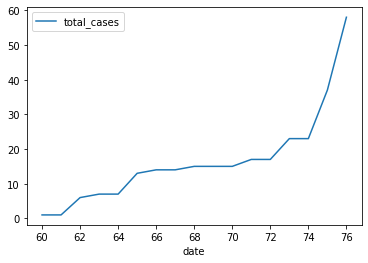

In [4]:
df.plot(x ='date', y='total_cases')

# Modelo polinomial

Predicción de una variable de respuesta cuantitativa a partir de una variable predictora cuantitativa, donde la relación se modela como una función polinomial de orden n (esto significa que pueden tener de diferentes exponenciales o grados y se debe ir probando)

Se puede tener una ecuacion con diferentes grados

y = a0 + a1x + a2x^2 + a3x^3 + … + anx^n + ε

Ejemplo de una regresion polinomica de grado 4.

# Regresion Polinomial

Función Resultado
        4         3         2
0.5401 x - 8.856 x + 52.25 x - 135.3 x + 147.6


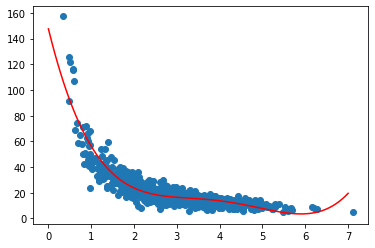

In [5]:

%matplotlib inline  
from pylab import *  
import numpy as np
import pandas as pd
import sympy as sp

# creamos algunas muestras aleatorias, en las que el numero de ventas de productos  
# se reduzca a medida que aumenta su precio  
np.random.seed(2)  
itemPrices = np.random.normal(3.0, 1.0, 1000)  
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / itemPrices

# calculamos la curva polinomica de 4 grado que se ajusta a los datos  
# usando la funcion polyfit  
x = np.array(itemPrices)  
y = np.array(purchaseAmount)

p4 = np.poly1d(np.polyfit(x, y, 4))
print("Función Resultado")
print(p4)
# pintamos la muestra y la funcion polinomica en rojo para ver como se ajusta  
import matplotlib.pyplot as plt

xp = np.linspace(0, 7, 100)  
plt.scatter(x, y)  
plt.plot(xp, p4(xp), c='r')  
plt.show()

In [10]:
df = pd.read_csv('ecuador-covid-data.csv').fillna(0) 
ndf= df.loc[(df['location'] == 'Ecuador') & (df['total_cases'] != 0)]  
ndf1=ndf[['date','total_cases','total_deaths']]

x=np.arange(1,len(ndf1)+1,1, dtype='float')
y=np.array(ndf1.values[:,1], dtype='float')
y1=np.array(ndf1.values[:,2],dtype='float')

           4           3         2
2.738e-05 x - 0.01672 x + 4.591 x + 186.9 x - 3242


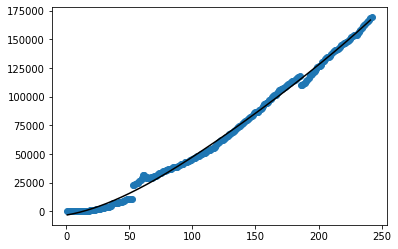

In [11]:
funcion_polinomial = np.poly1d(np.polyfit(x, y, 4))
print(funcion_polinomial)
plt.scatter(x, y) 
x1=np.arange(1,len(ndf1),1, dtype='float')
plt.plot(x1, funcion_polinomial(x1), c='black')  
plt.show()

            4            3          2
-1.578e-06 x + 0.001157 x - 0.1116 x + 41.55 x - 691.2


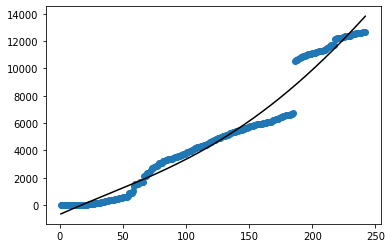

In [12]:

funcion_polinomial = np.poly1d(np.polyfit(x, y1, 4))
print(funcion_polinomial)
plt.scatter(x, y1)  
plt.plot(x, funcion_polinomial(x), c='black')  
plt.show()